# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
path = '/content/drive/MyDrive/aivle/6차 미니프로젝트/'

#### 3) 데이터 읽어오기

In [50]:
import os
file1 = 'data1.pkl'

In [51]:
data = joblib.load(os.path.join(path, file1))
data.isna().sum()

Date               0
Drive              0
Reservation        0
Ride               0
Avg_wait           0
Avg_tax            0
Avg_distance       0
temp_max           1
temp_min           1
rain(mm)           1
humidity_max(%)    1
humidity_min(%)    1
sunshine(MJ/m2)    1
Avg_wait_mean      6
Ride_ratio         0
Holiday            0
Day                0
Month              0
Season             0
Year               0
target             0
dtype: int64

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [37]:
# 숫자형 변수 분석
def num_des(var):
    des = data[[var]].describe().T
    print(des)
    
    plt.figure(figsize = (6, 8))
    plt.subplot(2, 1, 1)
    sns.histplot(data[var], bins = 20, kde = True)

    plt.subplot(2, 1, 2)
    plt.boxplot(x = data[var])

    plt.tight_layout()
    plt.show()

In [35]:
# 범주형 변수 분석
def cate_des(var):
    des = data[var].value_counts()/data[var].shape[0]
    print(des)
    
    sns.countplot(x = data[var])
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

        count        mean         std    min    25%    50%    75%     max
Drive  2923.0  418.647622  133.764485  132.0  278.0  454.0  522.0  1413.0


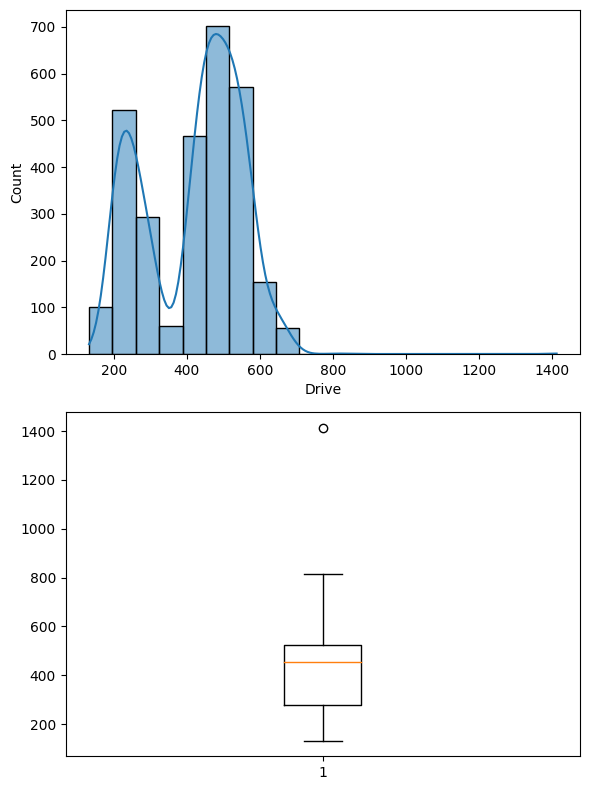

In [38]:
num_des('Drive')

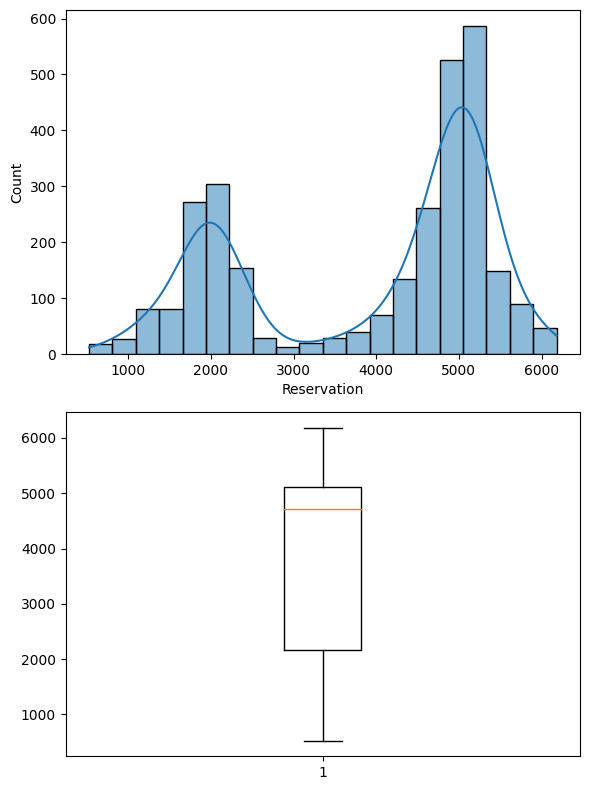

In [12]:
num_des('Reservation')

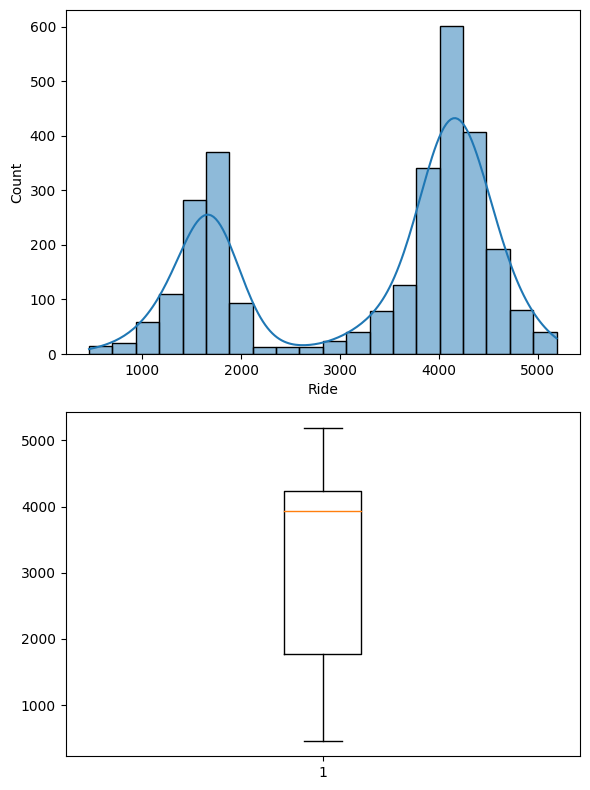

In [13]:
num_des('Ride')

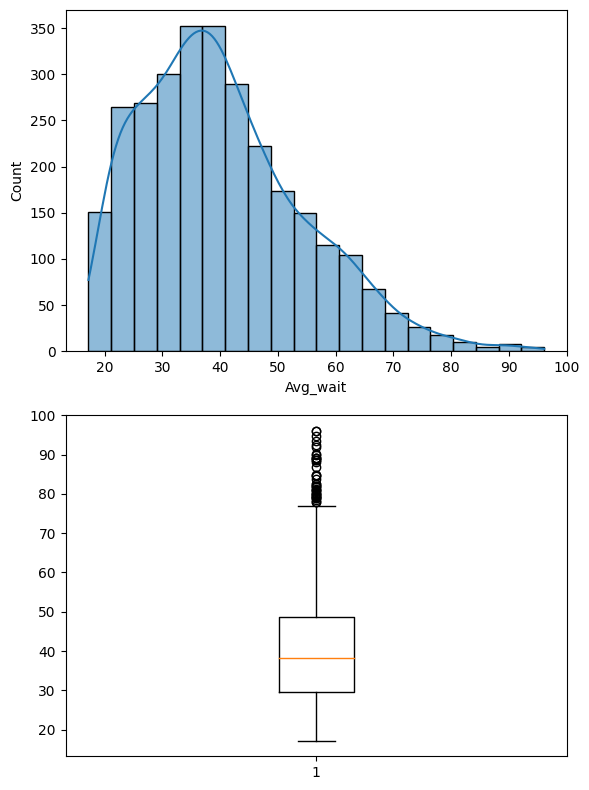

In [14]:
num_des('Avg_wait')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [ ]:
data.info()

Tuesday      0.143004
Thursday     0.143004
Friday       0.143004
Saturday     0.143004
Monday       0.142662
Wednesday    0.142662
Sunday       0.142662
Name: Day, dtype: float64


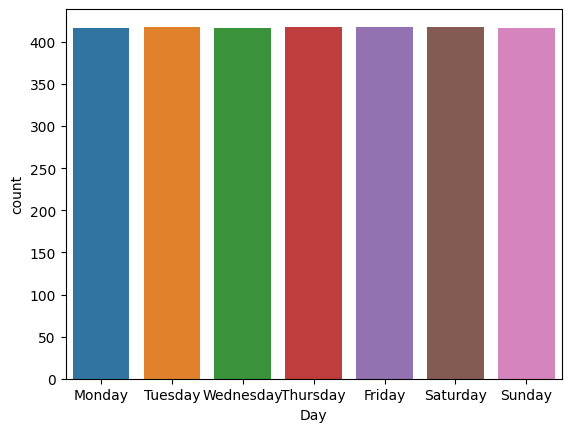

In [36]:
cate_des('Day')

October      0.085186
January      0.084844
March        0.084844
May          0.084844
July         0.084844
August       0.084844
December     0.084844
April        0.082107
June         0.082107
September    0.082107
November     0.082107
February     0.077318
Name: Month, dtype: float64


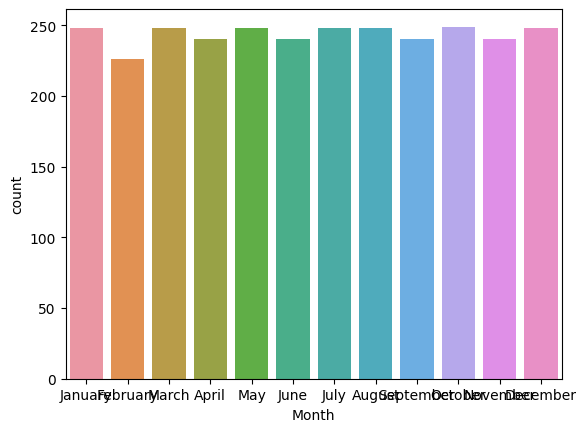

In [39]:
cate_des('Month')

Fall      0.252138
Summer    0.251796
Spring    0.249059
Winter    0.247007
Name: Season, dtype: float64


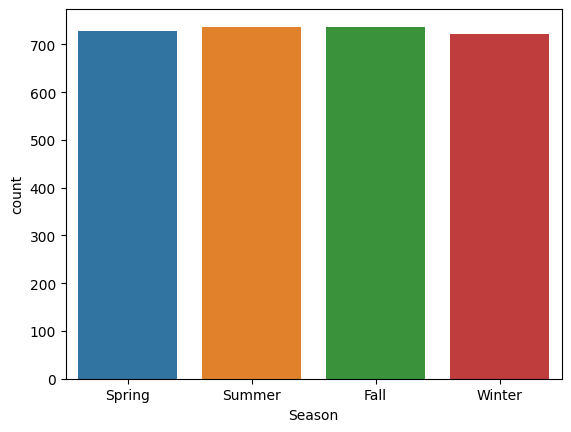

In [40]:
cate_des('Season')

0                          0.958946
Korean New Year's Day      0.008211
Midautumn Festival         0.008211
New year                   0.002737
Independence Day           0.002737
Children's Day             0.002737
Buddha's Birthday          0.002737
Memorial Day               0.002737
Liberation Day             0.002737
National Foundation Day    0.002737
Hangul Day                 0.002737
Christmas Day              0.002737
Name: Holiday, dtype: float64


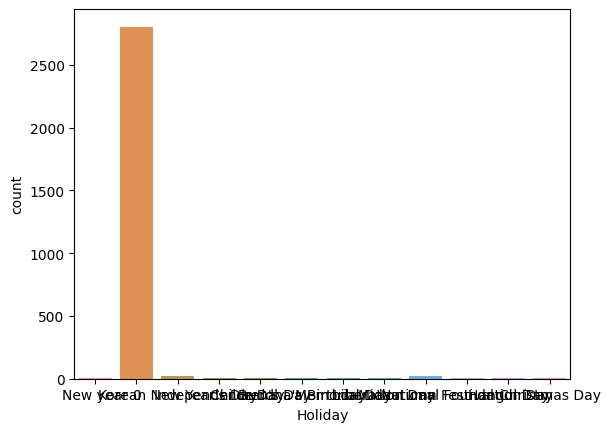

In [41]:
cate_des('Holiday')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

<ipython-input-79-d95cc782fd8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

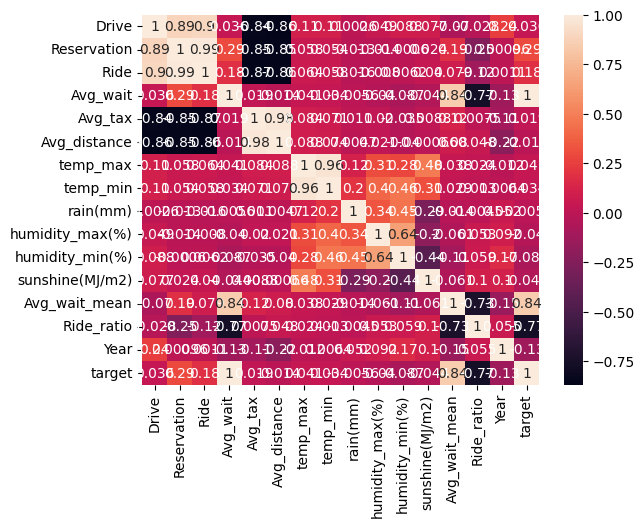

In [79]:
sns.heatmap(data.corr(),
            annot = True)

In [69]:
def num_feat(var):
    corr = data[[var, 'target']].corr()

    plt.figure(figsize = (8, 8))
    plt.subplot(2, 1, 1)
    sns.heatmap(corr,
                annot = True,
                fmt = '.3f')
    
    plt.subplot(2, 1, 2)
    plt.scatter(x = var, y = 'target', data = data)
    plt.show()

In [100]:
drop_cols = ['Avg_wait', 'Holiday', 'Day', 'Month', 'Season', 'Year']
temp = data.drop(drop_cols, axis = 1)

<ipython-input-101-349872256078>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top5_feature = temp.corr()['target'].abs().sort_values(ascending = False).index[1:6]


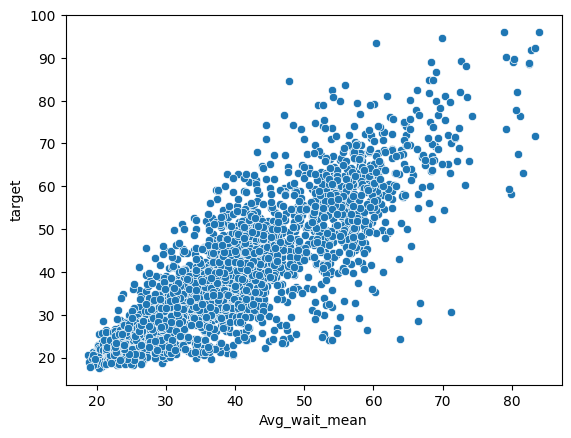

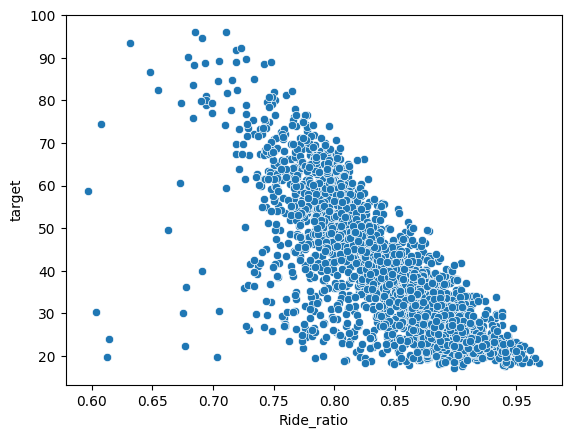

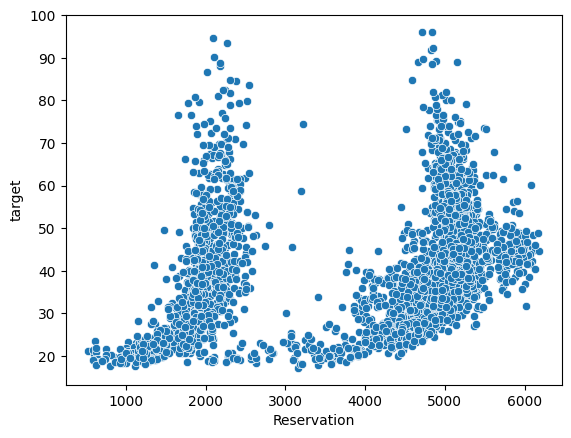

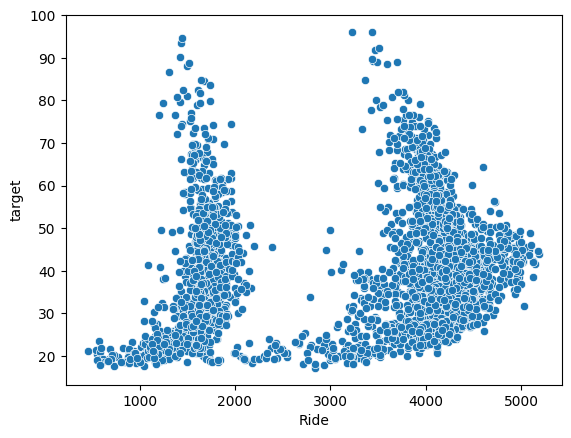

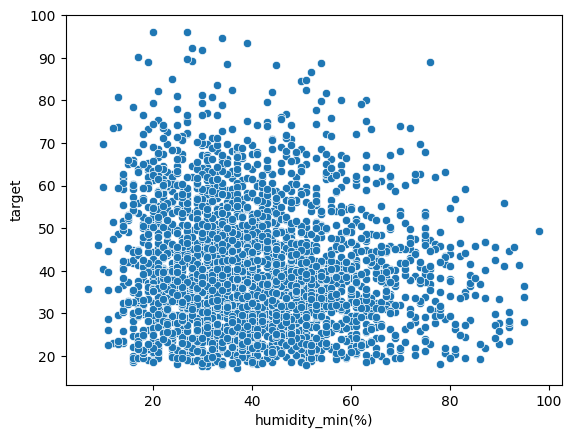

In [101]:
top5_feature = temp.corr()['target'].abs().sort_values(ascending = False).index[1:6]

for feature in top5_feature:
    sns.scatterplot(x=feature, y='target', data = temp)
    plt.xlabel(feature)
    plt.show()

<ipython-input-103-69afc174ed64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  low5_feature = temp.corr()['target'].abs().sort_values(ascending = True).index[:5]


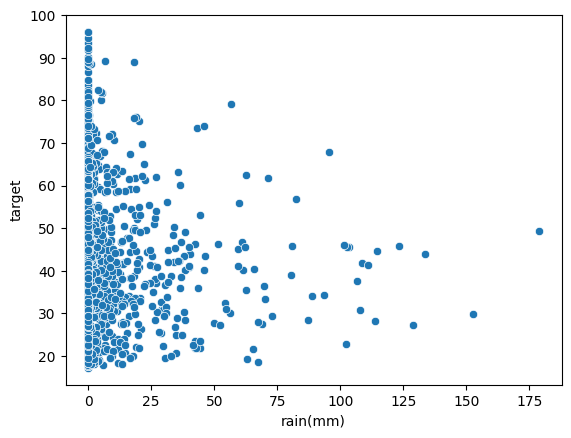

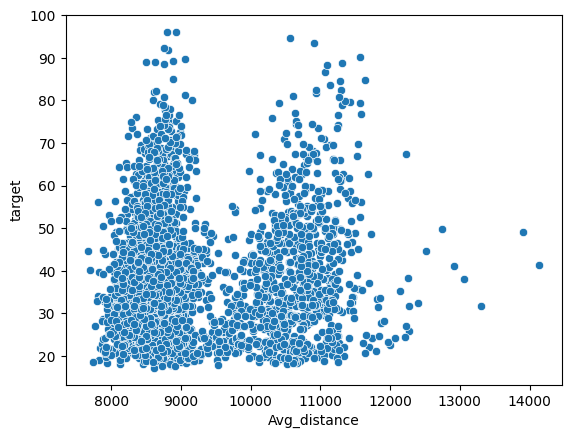

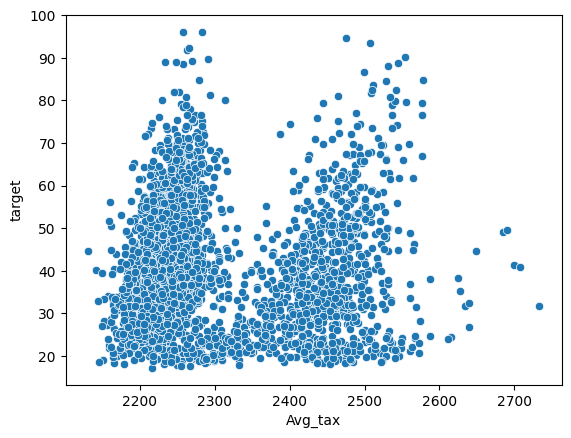

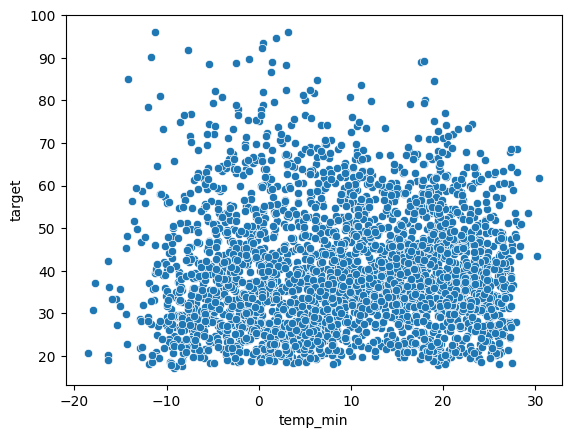

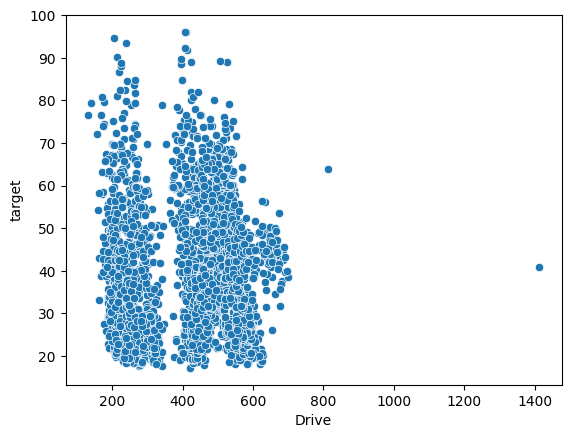

In [103]:
low5_feature = temp.corr()['target'].abs().sort_values(ascending = True).index[:5]

for feature in low5_feature:
    sns.scatterplot(x=feature, y='target', data = temp)
    plt.xlabel(feature)
    plt.show()

#### 2) 산점도

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

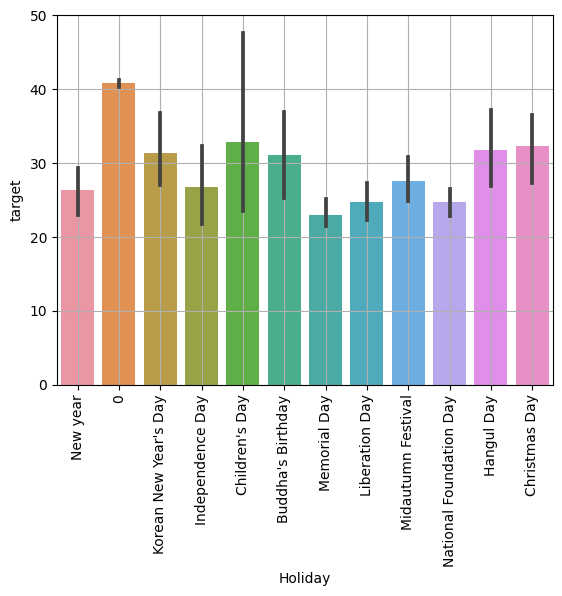

In [78]:
sns.barplot(x = 'Holiday', y = 'target', data = data)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [90]:
temp = data.loc[data['Holiday'].notnull()]

P_1 = temp.loc[temp['Holiday'] == '0', 'target']
P_2 = temp.loc[temp['Holiday'] == "Buddha's Birthday", 'target']
P_3 = temp.loc[temp['Holiday'] == "Children's Day", 'target']
P_4 = temp.loc[temp['Holiday'] == "Christmas Day", 'target']
P_5 = temp.loc[temp['Holiday'] == "Hangul Day", 'target']
P_6 = temp.loc[temp['Holiday'] == "Independence Day", 'target']
P_7 = temp.loc[temp['Holiday'] == "Korean New Year's Day", 'target']
P_8 = temp.loc[temp['Holiday'] == "Liberation Day", 'target']
P_9 = temp.loc[temp['Holiday'] == "Memorial Day", 'target']
P_10 = temp.loc[temp['Holiday'] == "Midautumn Festival", 'target']
P_11 = temp.loc[temp['Holiday'] == "National Foundation Day", 'target']
P_12 = temp.loc[temp['Holiday'] == "New year", 'target']

spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9, P_10, P_11, P_12)

F_onewayResult(statistic=8.463912569257724, pvalue=7.440110290704838e-15)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2923 non-null   datetime64[ns]
 1   Drive            2923 non-null   int64         
 2   Reservation      2923 non-null   int64         
 3   Ride             2923 non-null   int64         
 4   Avg_wait         2923 non-null   float64       
 5   Avg_tax          2923 non-null   int64         
 6   Avg_distance     2923 non-null   int64         
 7   temp_max         2922 non-null   float64       
 8   temp_min         2922 non-null   float64       
 9   rain(mm)         2922 non-null   float64       
 10  humidity_max(%)  2922 non-null   float64       
 11  humidity_min(%)  2922 non-null   float64       
 12  sunshine(MJ/m2)  2922 non-null   float64       
 13  Avg_wait_mean    2917 non-null   float64       
 14  Ride_ratio       2923 non-null   float64

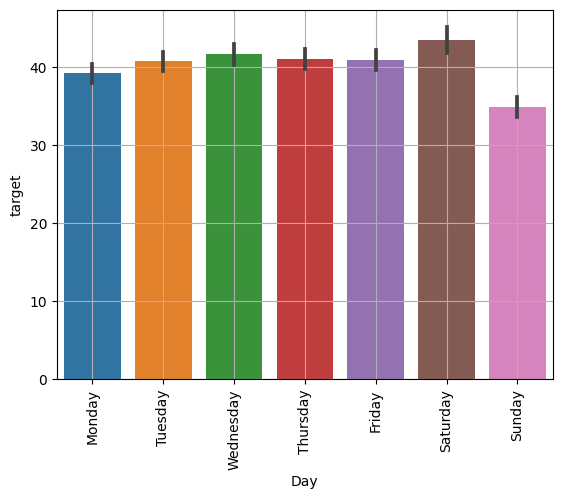

In [93]:
sns.barplot(x = 'Day', y = 'target', data = data)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [92]:
temp = data.loc[data['Day'].notnull()]

P_1 = temp.loc[temp['Day'] == 'Monday', 'target']
P_2 = temp.loc[temp['Day'] == "Tuesday", 'target']
P_3 = temp.loc[temp['Day'] == "Wednesday", 'target']
P_4 = temp.loc[temp['Day'] == "Thursday", 'target']
P_5 = temp.loc[temp['Day'] == "Friday", 'target']
P_6 = temp.loc[temp['Day'] == "Saturday", 'target']
P_7 = temp.loc[temp['Day'] == "Sunday", 'target']


spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6, P_7)

F_onewayResult(statistic=15.66669048966133, pvalue=8.814291693785567e-18)

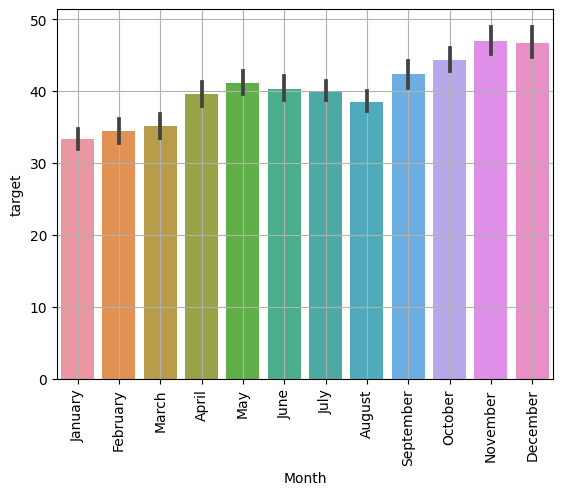

In [94]:
sns.barplot(x = 'Month', y = 'target', data = data)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

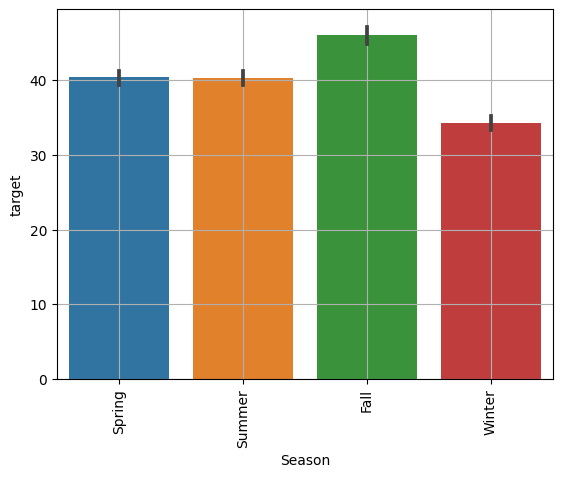

In [95]:
sns.barplot(x = 'Season', y = 'target', data = data)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [96]:
temp = data.loc[data['Season'].notnull()]

P_1 = temp.loc[temp['Season'] == 'Spring', 'target']
P_2 = temp.loc[temp['Season'] == "Summer", 'target']
P_3 = temp.loc[temp['Season'] == "Fall", 'target']
P_4 = temp.loc[temp['Season'] == "Winter", 'target']

spst.f_oneway(P_1, P_2, P_3, P_4)

F_onewayResult(statistic=91.79348404901829, pvalue=9.138409595103254e-57)

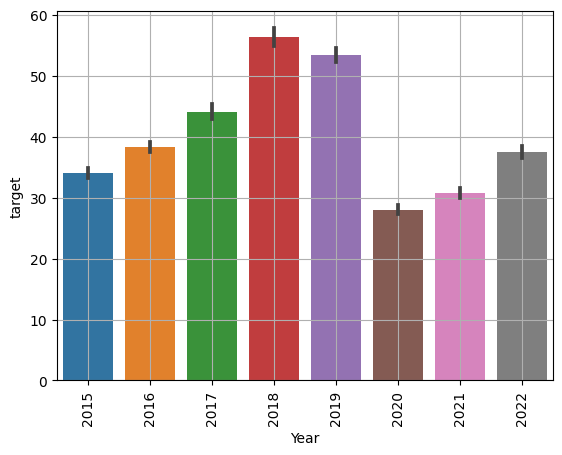

In [102]:
sns.barplot(x = 'Year', y = 'target', data = data)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
평균 대기 시간, 탑승률, 공휴일, 년도

* 중간(약한) 관계의 변수

In [ ]:
요일, 월별, 계절, 

* (거의) 관계가 없는 변수

In [ ]:
날짜, 강수량, 

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl